cleaning up all over again

In [1]:
from conv_reproj import match
from align_and_diff import a_d
from header_setup import read

from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from pm import pm_correct
from astropy import units as u
from astropy.wcs import WCS
import cmasher as cmr

from astropy.time import Time
from astropy.coordinates import SkyCoord

Match function imported.
running


In [2]:
from everything import full_analysis

Ready to go!


In [3]:
from radial import radial_read
from dens import density_model

In [4]:
from everything import plot_1d, plot_2d

In [5]:
import os

In [6]:
cd

/Users/iman


lr = 'jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits' \
hr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'

In [7]:
# hr = 'jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
# lr = 'jan29_data/from_server/Betelgeuse_all_cont_1-1.image.image.tt0.fits'
lr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_TC_cont.image.image.pbcor.fits'
hr = 'Documents/cuny_ms/jan29_data/from_server/Betelgeuse_TE_cont_R0.image.image.tt0.fits'
data3, data_1d3, radius3, data_dens_1d3, data_dens_2d3, data_plot3, info3 = full_analysis(hr,lr)
# this should be lr
info3['lr']['kspatres']
# this should be hr


False
First epoch shifted to second.
Header information imported.
Header information imported.


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Alignment and subtraction complete. Info dictionaries imported.


/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/iman/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy

0.18444060410509736

In [8]:
from everything import plot_1d, plot_1d_err,plot_1d_skip

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:284: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


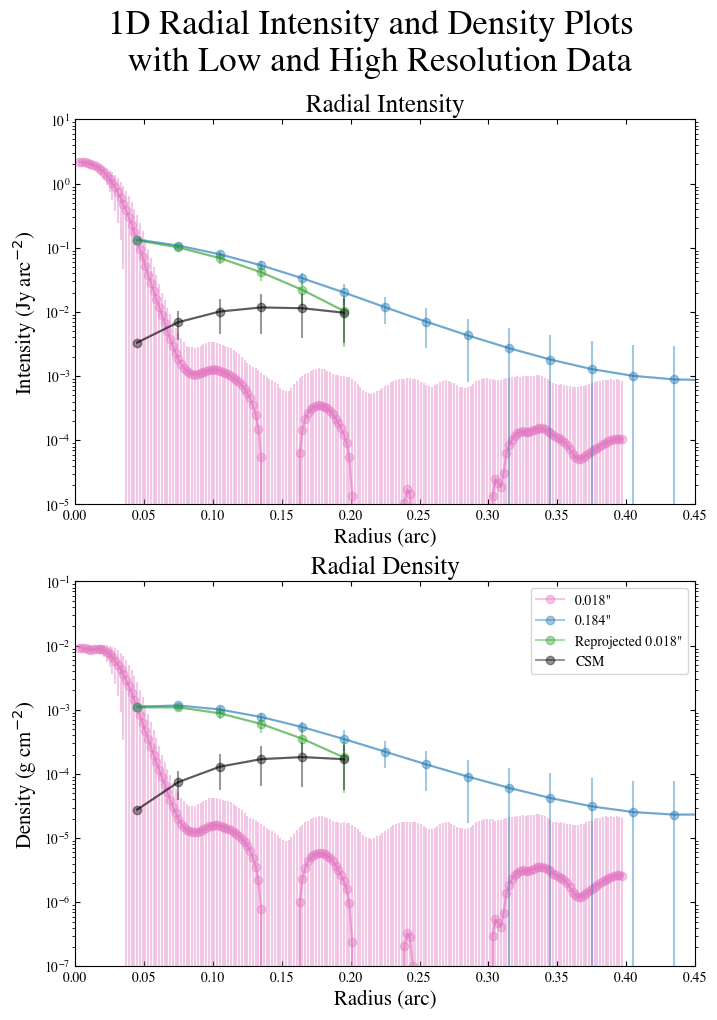

In [9]:
plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1, 
        suptitle = "1D Radial Intensity and Density Plots \n with Low and High Resolution Data")#,xmax=0.35)
#plot_1d(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=-1e-1,ax1_ymax=6e5,ax2_ymin=1e0,ax2_ymax=1e1)#,xmax=0.35)
#plt.savefig('thesis/lowhigh/1d_radial_all_LH.png')

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:349: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


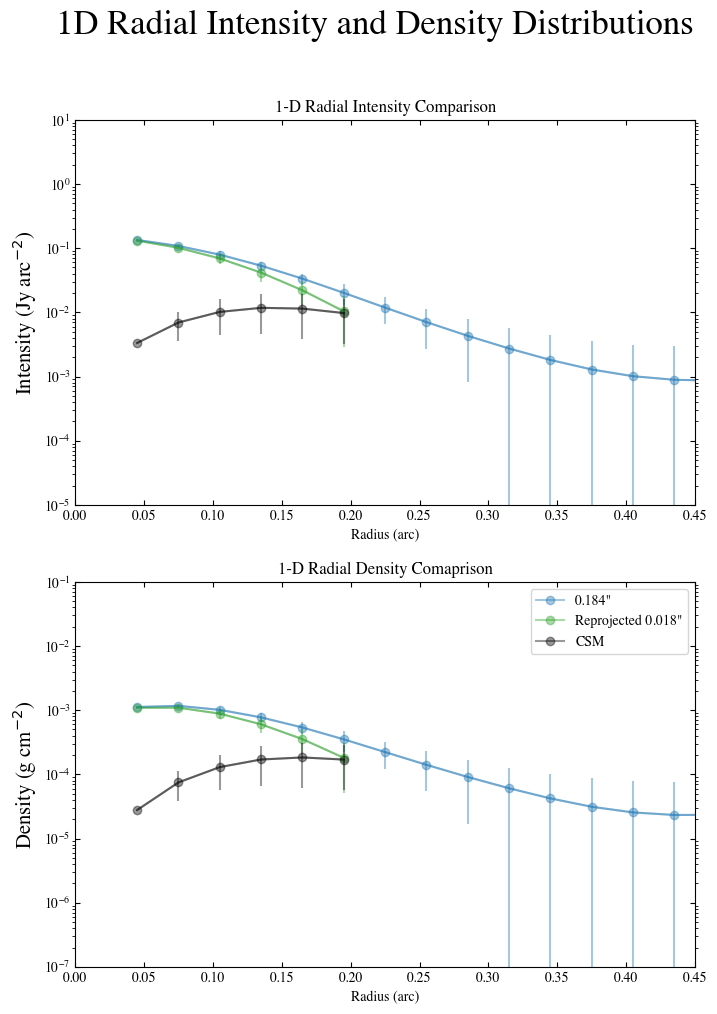

In [10]:
plot_1d_skip(data_1d3, data_dens_1d3,info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e1,ax2_ymin=1e-7,ax2_ymax=1e-1, 
             suptitle = "1D Radial Intensity and Density Distributions")#,xmax=0.35)
#plt.savefig('thesis/lowhigh/1d_radial_nohr_LH.png')

/Users/iman/Documents/cuny_ms/csm_pipeline/everything.py:221: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


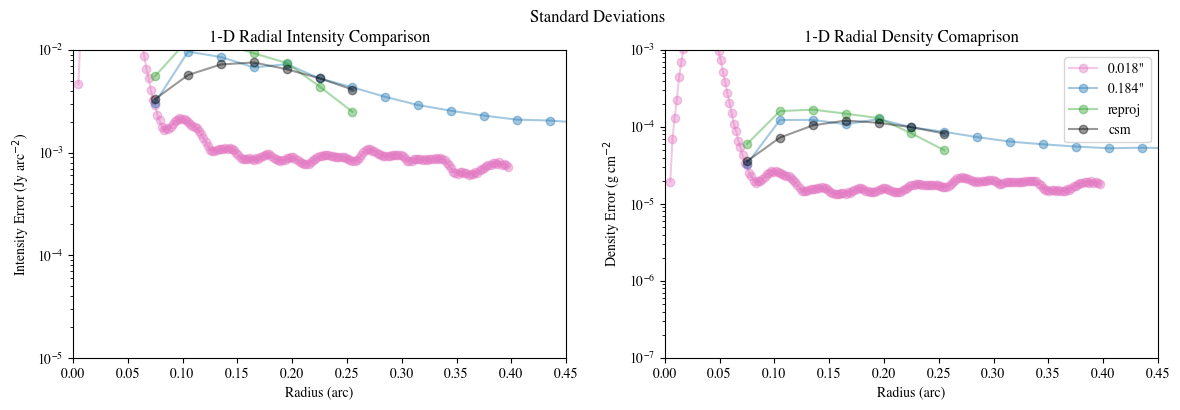

In [11]:
plot_1d_err(info3,radius3,ax1_ymin=1e-5,ax1_ymax=1e-2,ax2_ymin=1e-7,ax2_ymax=1e-3)#,xmax=0.35)


In [12]:
from dens import kappa
from astropy.modeling.models import BlackBody


In [13]:
def max_test(data_1d):
    title = ['hr','lr','reproj','csm']
    lmda_AA = 8.87e6*u.AA
    
    B = BlackBody(temperature = 3000*u.K)
    B=B(lmda_AA)
    arcsec2_per_sr=4.25e10*u.arcsec**2/u.sr
    ergcmshz_per_jy = 1.0e-23*u.erg/u.cm**2/u.s/u.Hz/u.Jy
    k = kappa(887.0*u.um)

    B_jy_arcsec2 = B/arcsec2_per_sr/ergcmshz_per_jy

    sigma={}

    for i in title:
        sigma[i]= np.nanmax(np.nanmax(data_1d[i]))/ (k*B_jy_arcsec2)

    return sigma


In [14]:
max_test(data_1d3)

{'hr': <Quantity 0.01111003 g / cm2>,
 'lr': <Quantity 0.00067893 g / cm2>,
 'reproj': <Quantity 0.00066209 g / cm2>,
 'csm': <Quantity 5.94529309e-05 g / cm2>}

In [15]:
print("hr: ",np.nanmax(data_dens_1d3['hr']))
print("lr: ",np.nanmax(data_dens_1d3['lr']))
print("reproj: ",np.nanmax(data_dens_1d3['reproj']))
print("csm: ",np.nanmax(data_dens_1d3['csm']))

hr:  0.009254187779894767 g / cm2
lr:  0.0011669808989895384 g / cm2
reproj:  0.0010921717033961196 g / cm2
csm:  0.00018330009836356855 g / cm2


csm, lr and reproj all get mapped to the same thing

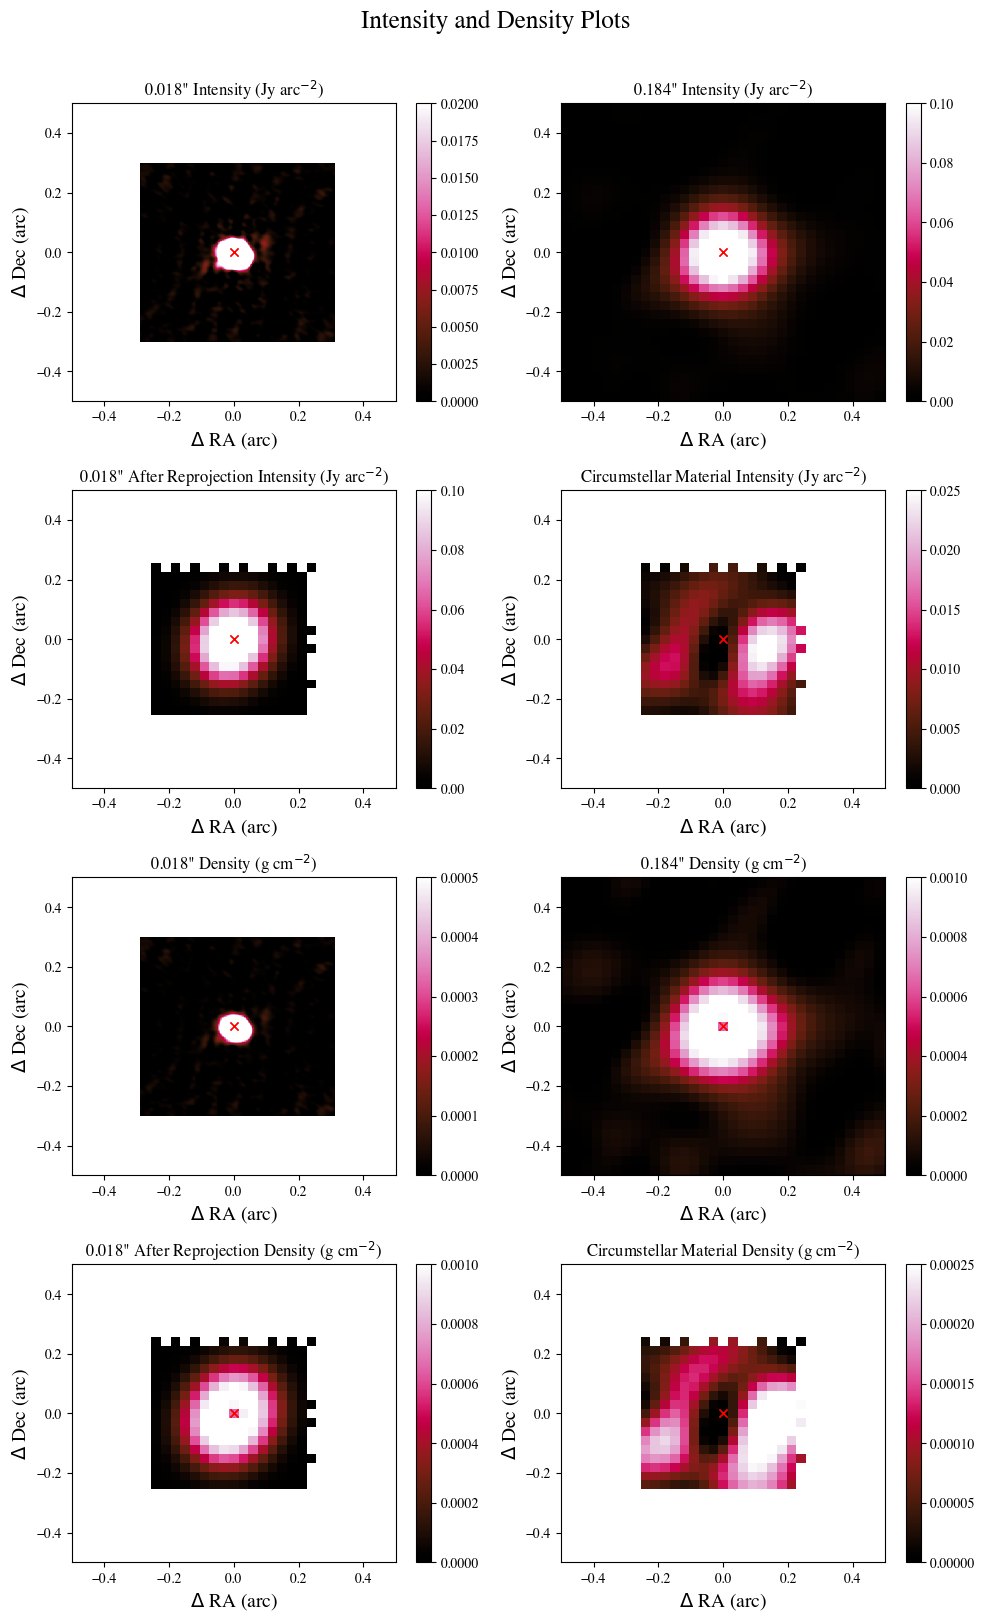

In [16]:
vminmax = [[0,.02], [0,.1],[0,.1],[0,0.025],
           [0,0.0005], [0,0.001],[0,0.001],[0,0.00025]]
plot_2d(data_plot3, info3, vminmax,minn=-.5)
#plt.savefig('thesis/lowhigh/2D_plots_LH.png')

## Abel transform

In [17]:
from abel import all_abel, do_abel, plot_1d_abel

In [18]:
d = {'hr': data_1d3['hr'], 'lr': data_1d3['lr'], 'reproj': data_1d3['reproj'],"csm": data_1d3['csm']}
i = {'hr': info3['hr'], 'lr': info3['lr'], 'reproj': info3['reproj'],"csm": info3['csm']}

In [19]:
abels = all_abel(d,radius3,i)

/Users/iman/Documents/cuny_ms/csm_pipeline/abel.py:95: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


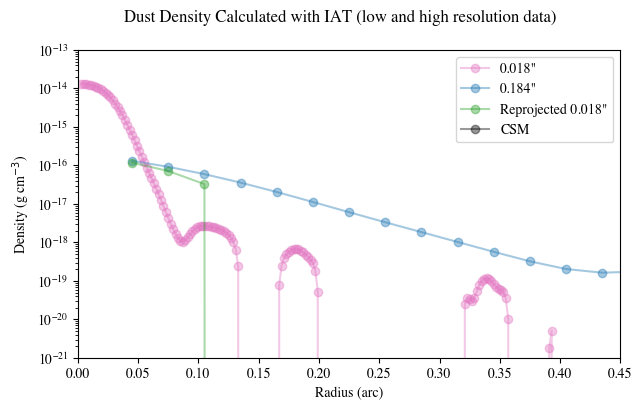

In [20]:
plot_1d_abel(abels,info3,radius3,ax_ymin=1e-21,ax_ymax=1e-13, suptitle = "Dust Density Calculated with IAT (low and high resolution data)")
#plt.savefig('thesis/lowhigh/1d_abel_LH.png')